### Precision and Recall

Sometimes classification data is not **balanced**.

This means that one class is overwhelmingly over (or under) represented in the dataset.

Example:  Identify a rare cancer from a photograph.

Almost all instances will be "benign".

This makes "accuracy" an unuseful measure of the performance of a model.

Simply saying "benign" every time results in high accuracy.

But what we really care about is avoiding "false negatives". 

---

Two useful notions for dealing with unbalanced data are precision and recall.

#### Precision

Precision is the frequency with which a model is correct when it reports an instance to be "positive".

$$precision = \frac{TP}{FP+TP}$$

We can maximize precision by having a very **high** standard for when something is declared to be a positive instance.

Sometimes this is what we want:

1. American justice system:  high standards for declaring guilt (ideally many guilty get away)

2. Net nanny:  We want to be very sure that a website is okay before letting children view it

Generally we like high precision when we are contemplating taking an action with grave consequences.


#### Recall

Recall is the fraction of positive instances that are reported by the algorithm.

$$recall = \frac{TP}{TP+FN}$$

We can maximize recall by having a very **low** standard for when something is declared to be a positive instance.

Sometimes this is what we want:

1. Flagging someone as a danger to society

2. Detecting cancer

Often we want high recall when we are seeking to detect something dangerous.


#### Balancing Precision and Recall

In many generic situations with unbalanced data we want precision and recall both to be pretty good.

A metric often used to measure the precision/recall tradeoff is [F1-score](https://en.wikipedia.org/wiki/F1_score).  

$$F_1 = \frac{2}{recall^{-1} + precision^{-1}}$$

This is the harmonic mean of precision and recall. 

It is optimized when recall and precision are pretty close to one another.

That is not always what we want. 


### Example with real data

An example is given below with handwritten digit recognition. 

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

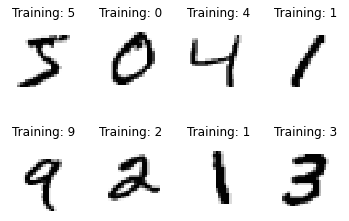

In [2]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X, y))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y_3 = (y=='3')*1

X_train,X_test,y_train,y_test = train_test_split(X,y_3)

max_iter = 3000
model = LogisticRegression(max_iter=max_iter)
model.fit(X_train,y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [4]:
y_hat = model.predict(X_test)
confusion_matrix(y_test,y_hat)

array([[15579,   164],
       [  265,  1492]])

### Confusion matrix

We are seeking to detect the character '3'.

In the above confusion matrix, the entries have the form

![img](http://www.theanalysisfactor.com/wp-content/uploads/2014/10/confusion-matrix.png)

In [5]:
cm = confusion_matrix(y_test,y_hat)
TN,FP = cm[0]
FN,TP = cm[1]
TN,FP,FN,TP

(15579, 164, 265, 1492)

In [6]:
## From the formula

precision = TP/(FP+TP)
precision

0.9009661835748792

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## From the library

precision_score(y_test,y_hat)

0.9009661835748792

In [8]:
## From the formula

recall = TP/(FN+TP)
recall

0.8491747296528173

In [9]:
## From the library
recall_score(y_test,y_hat)

0.8491747296528173

In [10]:
## This is simple accuracy 

model.score(X_test,y_test)

0.9754857142857143

In [11]:
## From the formula
f1 = 2/(1/recall + 1/precision)
f1

0.8743041312628186

In [12]:
## Using the library

f1_score(y_test,y_hat)

0.8743041312628186

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [4]:
y_hat = model.predict(X_test)
cm=confusion_matrix(y_test,y_hat)
cm

array([[1699,    0,    1,    0,    0,    5,    8,    1,   12,    0],
       [   0, 1939,    9,    3,    2,    2,    4,    4,    4,    2],
       [   6,    5, 1693,    8,    6,    0,    6,   12,   10,    2],
       [   0,    1,   31, 1690,    0,   20,    1,   16,   14,   12],
       [   4,    3,    4,    0, 1641,    1,    9,    3,    3,   38],
       [   6,    2,    3,   17,    4, 1519,   10,    0,   10,    7],
       [   9,    3,    1,    0,    3,    9, 1687,    0,    7,    0],
       [   1,    5,   23,    0,   11,    0,    0, 1760,    3,   20],
       [   1,    9,    8,   15,    7,   18,    4,    3, 1620,   21],
       [  14,    6,    3,   16,   15,    8,    0,   13,    9, 1656]])

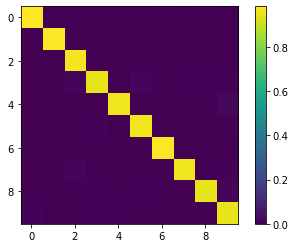

In [7]:
import matplotlib.pyplot as plt
import numpy as np

cm = cm / np.sum(cm,axis=1)
plt.imshow(cm)
plt.colorbar()
plt.show()

### Examples of false positives and false negatives

Handwritten characters are very visual, so it might be interesting to look at a few FP and FN.

In [14]:
false_predictions = (y_test != y_hat)
true_positive = (y_test == 1)
true_negative = ~true_positive

import numpy as np

false_negative = false_predictions & true_positive
assert(FN==np.sum(false_negative))

false_positive = false_predictions & true_negative
assert(FP==np.sum(false_positive))

samp_FN = X_test[false_negative]
samp_FP = X_test[false_positive]
y_FN = y_test[false_negative]
y_FP = y_test[false_positive]

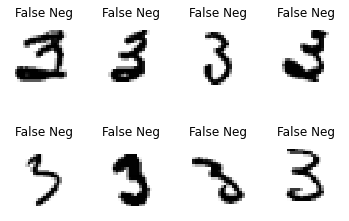

In [15]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(samp_FN, y_FN))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('False Neg'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('False Neg'.format(label))
    
    

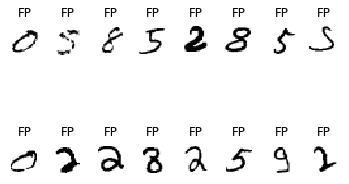

In [16]:
_, axes = plt.subplots(2, 8)
images_and_labels = list(zip(samp_FP, y_FP))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('FP'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[8:16]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('FP'.format(label))
    
   

### Adjusting the threshold

The model that we are using here is logistic regression.

This model has a nice feature:  It can estimate probabilities.

The default threshold for a "positive" instance is $p = 0.5$.

But we can manually adjust this.

As we make it harder to be labled positive

* what happens to precision?
* what happens to recall?



In [20]:
probs = model.predict_proba(X_test)[:,1]

y_hat = (probs >= 0.75)*1

accuracy_score(y_hat,y_test)

0.9725142857142857

In [21]:
precision_score(y_test,y_hat),recall_score(y_test,y_hat)

(0.9544159544159544, 0.7626636311895276)

In [22]:
f1_score(y_test,y_hat)

0.8478329642518191

### Precision and recall as a function of threshold

Below we make a plot of how the threshold affects both precision and recall.



In [23]:
import numpy as np
precs = []
recs = []
f1s = []
p = np.linspace(0,1)[1:-1]
for pp in p:
    y_hat = (probs > pp)
    precs.append(precision_score(y_test,y_hat))
    recs.append(recall_score(y_test,y_hat))
    f1s.append(f1_score(y_test,y_hat))

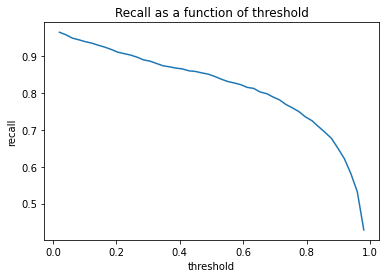

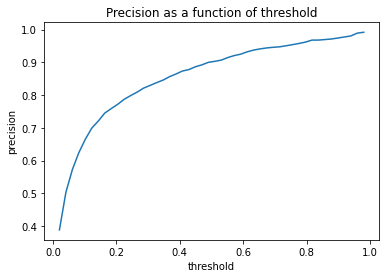

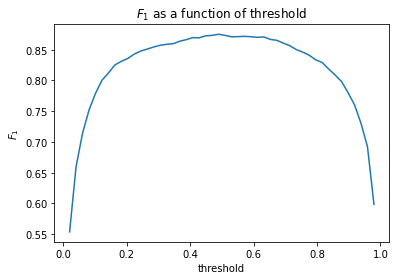

In [24]:
plt.plot(p,recs)
plt.xlabel("threshold")
plt.ylabel("recall")
plt.title("Recall as a function of threshold")
plt.show()

plt.plot(p,precs)
plt.xlabel("threshold")
plt.ylabel("precision")
plt.title("Precision as a function of threshold")
plt.show()


plt.plot(p,f1s)
plt.xlabel("threshold")
plt.ylabel(r"$F_1$")
plt.title(r"$F_1$ as a function of threshold")
plt.show()




### Recall as a function of precision

Below we plot recall as a function of precision.

Ideally recall would be 1.0 for every value of precision.



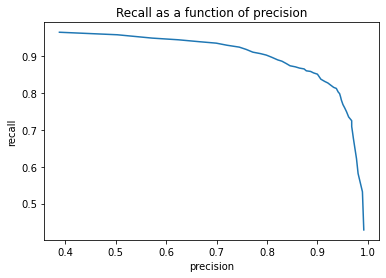

In [25]:
plt.plot(precs,recs)
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("Recall as a function of precision")
plt.show()

### ROC Curves

ROC = [Receiver Operator Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

The ROC curve plots *true positive rate* (aka recall or sensitivity) against the *false positive rate*.

The false positive rate is 

$$\frac{FP}{N} = \frac{FP}{TN+FP}$$

This is the "probability of false alarm".

As the probability of false alarm goes to 1, recall also goes to 1.

(Because the number of false positives approaches the number of negatives.)

As the probability of false alarm goes to 0, recall also goes to 0. 

(Because fewer positives are predicted.)





In [26]:
from sklearn.metrics import roc_curve

fpr, tpr,thresholds = roc_curve(y_test,probs)

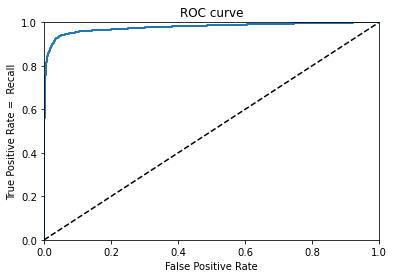

In [27]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate =  Recall")
    plt.title("ROC curve")
plot_roc_curve(fpr,tpr)
plt.show()

### ROC AUC

A measure of the quality of a model is the area under the ROC curve (AUC).

A perfect model will have a ROC AUC of 1.

A random model will have a ROC AUC score of $\frac{1}{2}$.

---

To determine a ROC curve you need the probability (or confidence) that the model has in each decision.


In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,probs)

0.9780268224838418

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

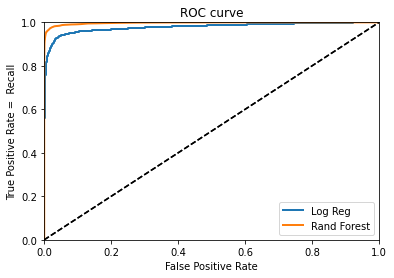

In [33]:
probs_RF = model.predict_proba(X_test)[:,1]

fpr_RF, tpr_RF ,thresholds_RF = roc_curve(y_test,probs_RF)


plot_roc_curve(fpr,tpr,"Log Reg")
plot_roc_curve(fpr_RF,tpr_RF,"Rand Forest")
plt.legend()
plt.show()


In [34]:
roc_auc_score(y_test,probs_RF)

0.9972158082310372

In [35]:
y_hat = model.predict(X_test)

precision_score(y_test,y_hat), recall_score(y_test,y_hat), f1_score(y_test,y_hat)

(0.9953977646285339, 0.8616960728514513, 0.9237339841366687)